스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
508.8927233831078

전체 최고
[0, 44, 91, 52, 78, 79, 88, 94, 30, 14, 92, 28, 17, 56, 60, 24, 42, 45, 75, 3, 76, 27, 36, 41, 67, 48, 20, 53, 16, 32, 74, 97, 34, 22, 19, 26, 39, 46, 81, 18, 72, 55, 98, 96, 50, 51, 12, 66, 10, 58, 29, 73, 43, 5, 80, 21, 82, 64, 83, 15, 70, 47, 8, 84, 49, 59, 85, 40, 63, 61, 7, 25, 23, 69, 90, 2, 31, 89, 1, 57, 65, 11, 68, 33, 38, 62, 9, 87, 13, 95, 54, 71, 86, 6, 77, 37, 93, 99, 35, 4, 0]
457.97118799131476
################

현재 세대: 6260
평균
513.519196009315

세대내 최고
[0, 44, 91, 52, 78, 79, 45, 75, 3, 76, 27, 36, 41, 67, 48, 20, 53, 16, 32, 74, 97, 34, 22, 19, 26, 39, 46, 81, 18, 72, 55, 82, 64, 83, 15, 70, 47, 8, 84, 49, 59, 85, 40, 63, 61, 7, 25, 23, 69, 90, 2, 31, 1, 89, 57, 65, 11, 68, 33, 38, 62, 9, 87, 13, 95, 54, 71, 86, 6, 77, 37, 93, 99, 35, 88, 94, 30, 14, 92, 28, 17, 60, 24, 42, 98, 96, 50, 51, 12, 66, 10, 58, 29, 73, 43, 5, 80, 21, 56, 4, 0]
502.0512262749261

전체 최고
[0, 44, 91, 52, 78, 79, 88, 94, 30, 14, 92, 28, 1

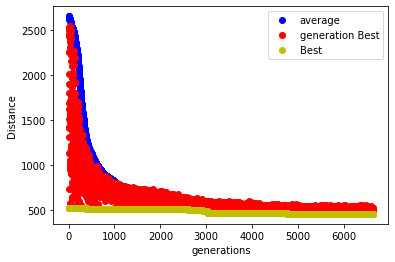

In [216]:
import random
import pandas as pd
import math
import numpy as np

def Euclidean_Distance(A,B):
    #print(A,B)
    d = (A[1] - B[1]) ** 2 + (A[2] - B[2]) ** 2
    d = math.sqrt(d)
    return d

def Nearleast(dList, route):
    shortVal = 10e9
    shortIndex = -1
    for i in range(len(dList)):
        if shortVal > dList[i] and not i in route:
            #print(f"dList[i]: {dList[i]}")
            shortVal = dList[i]
            shortIndex = i
    #print(f"shortIndex: {shortIndex}, dList[i]: {dList[shortIndex]}")

    #print(shortVal, shortIndex)
    
    return shortVal, shortIndex



pMat = pd.read_csv("Input_data.csv")
pMat = pd.DataFrame(pMat)

#print(pMat)
#print(pMat.iloc[1][2])

n = pMat.shape[0]
dMat = [[0]*n for _ in range(n)]

for i in range(n):
    for j in range(i,n):
        if i == j:
            dMat[i][j] = 1e10
        else:
            dMat[i][j] = dMat[j][i] = Euclidean_Distance(pMat.iloc[i], pMat.iloc[j])


#print(*dMat, sep = "\n")



# 중복없이 랜덤한 수 2개 추출
def random2(start, end):
    aList = []
    for i in range(2):
        a = random.randint(start, end)
        while a in aList:
            a = random.randint(start, end)
        aList.append(a)

    aList.sort()
    return aList


def get_total_distance(route: list):
    distance = 0
    for i in range(len(route)-1):
        #print(route[i], route[i+1], dMat[route[i]][route[i+1]], distance)
        distance += dMat[route[i]][route[i+1]]
    return distance

# get randomRoutes * n
def randomRoute(n):
    currentIndex = 0
    distance = 0

    routeList = []
    distanceList = []

    #print(len(route))
    #print(route)

    for i in range(n):
        route = [x for x in range(1, 100)]
        random.shuffle(route)
        route = [0] + route + [0]
        routeList.append(route)
        distanceList.append(get_total_distance(route))

    return routeList, distanceList


# 평균 적합도 계산용
def average(f : list):
    return sum(f)/len(f)


# 최고 적합도 계산
def bestFit(f : list):
    bestIndex = -1
    bestFit = 10e9
    for i in range(len(f)):
        if f[i] < bestFit:
            bestFit = f[i]
            bestIndex = i

    return bestFit, bestIndex

# 임의의 두 도시를 교환하는 방식
def mutation(path, p = 0.03):

    if random.random() < p:
        i, j  = random2(1, len(path) - 2)

        path[i], path[j] = path[j], path[i]

    return path

def crossover(parent1, parent2):
    child = []
    childP1 = []
    childP2 = []
    
    geneA = int(random.random() * len(parent1))
    geneB = int(random.random() * len(parent1))
    
    startGene = min(geneA, geneB)
    endGene = max(geneA, geneB)

    for i in range(startGene, endGene):
        childP1.append(parent1[i])
        
    childP2 = [item for item in parent2 if item not in childP1]

    child = childP1 + childP2
    return child 

def selection(p, f):
    # 2개의 부모를 선택

    # 해1, 해2
    pA = []
    pAindex = -1
    pB = []
    pBindex = -1

    
    #적합도의 역수를 가중치로 둠
    weight = np.array(f)
    weight = list(np.reciprocal(weight))

    List = [ x for x in range(0, len(p))]

    pAindex, pBindex = random.choices(List, weights=weight, k=2)

    pA = p[pAindex]
    pB = p[pBindex]

    if f[pAindex] < f[pBindex]:
         return pA, pB, pAindex, pBindex

    else:
        return pB, pA, pBindex, pAindex


def genetic():

    # 인구 수
    p = 100

    # 세대 수
    generation = 1000000

    # 자식 수
    offspring = 20

    # 초기 인구, 적합도
    p0 , f0  = randomRoute(p-1)
    p0 = p0 + [[0, 4, 52, 78, 79, 88, 94, 30, 14, 92, 28, 17, 56, 60, 24, 42, 45, 75, 3, 76, 27, 36, 41, 67, 48, 20, 53, 16, 32, 74, 97, 34, 22, 19, 26, 39, 46, 81, 18, 72, 55, 82, 64, 83, 15, 70, 47, 8, 84, 49, 59, 85, 40, 63, 61, 7, 25, 23, 69, 90, 2, 31, 89, 1, 57, 65, 11, 68, 33, 38, 62, 9, 87, 13, 95, 54, 71, 86, 6, 77, 37, 93, 99, 35, 44, 91, 98, 96, 50, 51, 12, 66, 10, 58, 29, 73, 43, 5, 21, 80, 0]]
    f0 = f0 + [523.7415420152441]

    print(p0)
    print(f0)

    # 현재 인구
    pCurrent = p0

    # 현재 적합도
    fCurrent = f0

    # 적합도 평균
    fAvg = average(fCurrent)

    # 최고 적합도
    fBest, fBestIndex = bestFit(fCurrent)

    # 최고 적합도의 path
    pBest = pCurrent[fBestIndex]


    avgList = []
    gBestList = []
    BestList = []


    # 설정해둔 세대 수 만큼 진행
    for i in range(generation):


        # 세대 내 최고
        gfBest = 10e9
        gpBest = []




        """
        selected = []
        for _ in range(offspring):
            # selection
            pA, pB, pAIndex, pBIndex = selection(pCurrent, fCurrent)

            while (pAIndex, pBIndex) in selected:
                pA, pB, pAIndex, pBIndex = selection(pCurrent, fCurrent)


            # crossover and mutation
            

            
            selected.append((pAIndex, pBIndex))
        """
        o = []
        for j in range(offspring):

            pA, pB, pAIndex, pBIndex = selection(pCurrent, fCurrent)
            o1 = crossover(pA[1:len(pA)-1], pB[1:len(pB)-1])
            o1 = [0] + o1 + [0]
            #o2 = [0] + o2 +[0]

            o1 = mutation(o1)

            o.append(o1)

        """
        print(pA, pB, pAIndex, pBIndex, sep='\n')
        print(get_total_distance(pA))
        print(get_total_distance(pB))
        """

        # calcultate fitness and population

        for o1 in o:

            pTemp = pCurrent + [o1]
            distance = get_total_distance(o1)
            fTemp = fCurrent + [distance]

            if distance < gfBest:
                gfBest = distance
                gpBest = o1
            
            #print(o1)
            #print(get_total_distance(o1))
        #(path, fitness)
        Temp = []

        for j in range(len(pTemp)):
            Temp.append((pTemp[j], fTemp[j]))

        Temp.sort(key = lambda x:x[1])

        #print(*Temp, sep = '\n')

        #print(Temp[0][1])

        fCurrent = []
        pCurrent = []
        for j in range(p):
            pCurrent.append(Temp[j][0])
            fCurrent.append(Temp[j][1])


        # print(*pCurrent, sep = '\n')
        # print(fCurrent)

        fAvg = average(fCurrent)

        if gfBest < fBest:
            fBest = gfBest
            pBest = gpBest


        print(f"현재 세대: {i+1}")
        #print(*fCurrent, sep='\n')


        print("평균")
        print(fAvg)

        # 세대내 최고
        print("\n세대내 최고")
        print(gpBest)
        print(gfBest)


        # 전체 최고
        print("\n전체 최고")
        print(pBest)
        print(fBest)
        print("################")
        print()

        avgList.append(fAvg)
        gBestList.append(gfBest)
        BestList.append(fBest)


        if gfBest < 510 and fBest < 510 and fAvg < 510:
            print("목표 달성")
            break

    return avgList, gBestList, BestList

a, b, c = genetic()

import matplotlib.pyplot as plt

xaxis = [ x for x in range(len(a))]
plt.plot(xaxis,a, "bo", label='average')
plt.plot(xaxis,b,"ro", label='generation Best')
plt.plot(xaxis,c, "yo", label='Best')
plt.legend()
plt.xlabel('generations')
plt.ylabel('Distance')
plt.show()


In [84]:
a = [0, 60, 94, 23, 44, 70, 81, 59, 82, 86, 4, 32, 1, 42, 56, 20, 84, 45, 17, 50, 33, 76, 91, 68, 75, 54, 85, 38, 31, 87, 26, 97, 63, 77, 8, 18, 62, 10, 99, 43, 35, 65, 90, 78, 6, 72, 30, 64, 25, 9, 3, 80, 40, 13, 88, 28, 89, 96, 29, 95, 36, 27, 98, 34, 83, 21, 79, 24, 39, 46, 51, 73, 74, 67, 92, 93, 57, 41, 49, 71, 52, 48, 2, 22, 15, 5, 16, 37, 69, 14, 61, 7, 12, 11, 53, 47, 19, 66, 58, 55, 0]

print(get_total_distance(a))

2602.1142056415742


In [214]:
def breed(parent1, parent2):
    child = []
    childP1 = []
    childP2 = []
    
    geneA = int(random.random() * len(parent1))
    geneB = int(random.random() * len(parent1))
    
    startGene = min(geneA, geneB)
    endGene = max(geneA, geneB)

    for i in range(startGene, endGene):
        childP1.append(parent1[i])
        
    childP2 = [item for item in parent2 if item not in childP1]

    print(childP1)
    print(childP2)

    child = childP1 + childP2
    return child 

a = [51, 20, 18, 17, 88, 12, 36, 91, 39, 69, 5, 60, 85, 43, 93, 47, 80, 87, 57, 42, 76, 56, 92, 35, 32, 46, 95, 94, 64, 82, 90, 70, 73, 10, 23, 74, 83, 75, 41, 21, 86, 67, 7, 97, 89, 16, 30, 38, 44, 37, 3, 96, 19, 45, 2, 77, 8, 55, 31, 25, 63, 62, 48, 65, 59, 4, 68, 40, 61, 1, 71, 66, 53, 14, 28, 99, 15, 49, 13, 33, 6, 72, 98, 54, 26, 27, 24, 9, 84, 34, 11, 52, 81, 78, 58, 79, 22, 29, 50]
b = [74, 73, 66, 27, 43, 19, 58, 6, 78, 18, 38, 32, 60, 11, 57, 64, 9, 37, 83, 55, 50, 92, 62, 69, 89, 3, 86, 98, 21, 48, 10, 82, 41, 14, 29, 85, 22, 79, 51, 4, 28, 25, 16, 2, 13, 53, 5, 35, 23, 71, 95, 76, 91, 47, 93, 26, 12, 36, 24, 81, 72, 31, 63, 84, 39, 56, 17, 67, 75, 15, 96, 34, 88, 7, 97, 1, 70, 46, 42, 44, 54, 8, 52, 77, 65, 30, 99, 68, 90, 94, 80, 61, 45, 49, 20, 59, 33, 40, 87]

print(breed(a,b))
#print(breed(a, b))
#print(len(breed(a,b)))

[30, 38, 44, 37, 3, 96, 19, 45, 2, 77, 8, 55, 31, 25, 63, 62, 48, 65, 59, 4, 68, 40, 61, 1, 71, 66, 53, 14, 28, 99, 15, 49, 13, 33, 6, 72, 98, 54, 26, 27, 24, 9, 84, 34, 11, 52, 81, 78, 58, 79]
[74, 73, 43, 18, 32, 60, 57, 64, 83, 50, 92, 69, 89, 86, 21, 10, 82, 41, 29, 85, 22, 51, 16, 5, 35, 23, 95, 76, 91, 47, 93, 12, 36, 39, 56, 17, 67, 75, 88, 7, 97, 70, 46, 42, 90, 94, 80, 20, 87]
[30, 38, 44, 37, 3, 96, 19, 45, 2, 77, 8, 55, 31, 25, 63, 62, 48, 65, 59, 4, 68, 40, 61, 1, 71, 66, 53, 14, 28, 99, 15, 49, 13, 33, 6, 72, 98, 54, 26, 27, 24, 9, 84, 34, 11, 52, 81, 78, 58, 79, 74, 73, 43, 18, 32, 60, 57, 64, 83, 50, 92, 69, 89, 86, 21, 10, 82, 41, 29, 85, 22, 51, 16, 5, 35, 23, 95, 76, 91, 47, 93, 12, 36, 39, 56, 17, 67, 75, 88, 7, 97, 70, 46, 42, 90, 94, 80, 20, 87]


In [135]:
def mate_progenitors(prog_a, prog_b):
    offspring = prog_a[0:5]

    for city in prog_b:

        if not city in offspring:
            offspring = np.concatenate((offspring,[city]))

    return offspring


a = [0, 51, 20, 18, 17, 88, 12, 36, 91, 39, 69, 5, 60, 85, 43, 93, 47, 80, 87, 57, 42, 76, 56, 92, 35, 32, 46, 95, 94, 64, 82, 90, 70, 73, 10, 23, 74, 83, 75, 41, 21, 86, 67, 7, 97, 89, 16, 30, 38, 44, 37, 3, 96, 19, 45, 2, 77, 8, 55, 31, 25, 63, 62, 48, 65, 59, 4, 68, 40, 61, 1, 71, 66, 53, 14, 28, 99, 15, 49, 13, 33, 6, 72, 98, 54, 26, 27, 24, 9, 84, 34, 11, 52, 81, 78, 58, 79, 22, 29, 50, 0]
b = [0, 74, 73, 66, 27, 43, 19, 58, 6, 78, 18, 38, 32, 60, 11, 57, 64, 9, 37, 83, 55, 50, 92, 62, 69, 89, 3, 86, 98, 21, 48, 10, 82, 41, 14, 29, 85, 22, 79, 51, 4, 28, 25, 16, 2, 13, 53, 5, 35, 23, 71, 95, 76, 91, 47, 93, 26, 12, 36, 24, 81, 72, 31, 63, 84, 39, 56, 17, 67, 75, 15, 96, 34, 88, 7, 97, 1, 70, 46, 42, 44, 54, 8, 52, 77, 65, 30, 99, 68, 90, 94, 80, 61, 45, 49, 20, 59, 33, 40, 87, 0]
c = mate_progenitors(a,b)
#print(c)
#print(len(c))

a = [1,2,3,4,5,6,7,8]
b = [8,5,2,1,3,6,4,7]


def get_next_cycle(a, b, i):
    pass

def cycle_cross(a, b):
    offspring = [-1] * (len(a)-2)

    #a_SE = a[1:len(a)-1]
    #b_SE = b[1:len(b)-1]


    next = 0
    nexti = 0
    cycle = []
    isA = True
    for j in range(5):
        if offspring[next] == -1:
            offspring[next] = a[next]
        
        elif isA:
            next = b[next]
            nexti = a.index(b[next])
            isA = not isA
        elif not isA:
            next = a[next]
            nexti = b.index(b[next])
            isA = not isA

        print(next, nexti)


    return offspring

cycle_cross(a, b)


0 0


IndexError: ignored

In [195]:
a = [0, 4, 52, 78, 79, 88, 94, 30, 14, 92, 28, 17, 56, 60, 24, 42, 45, 75, 3, 76, 27, 36, 41, 67, 48, 20, 53, 16, 32, 74, 97, 34, 22, 19, 26, 39, 46, 81, 18, 72, 55, 82, 64, 83, 15, 70, 47, 8, 84, 49, 59, 85, 40, 63, 61, 7, 25, 23, 69, 90, 2, 98, 96, 50, 51, 12, 66, 10, 58, 29, 73, 43, 5, 21, 80, 31, 89, 1, 57, 65, 11, 68, 33, 38, 62, 9, 87, 13, 95, 54, 71, 86, 6, 77, 37, 93, 99, 35, 44, 91, 0]
print(get_total_distance(a))


456.77813325180597


In [64]:
def fillNoneWithSwappedValue(arr1 ,arr2 ,final1 ,final2 ):
    for a in range(0,arr1.__len__()):
        if final1[a] == None:
            final1[a] = arr2[a]
        if final2[a] == None:
            final2[a] = arr1[a]
    return final1,final2

def indexOf(arr,x):
    for a in range(0,arr.__len__()):
        if arr[a] == x:
            return a
    return -1


def crossoverOperator( parent1, parent2 ):
    offspring1 = [None] * parent1.__len__()
    offspring2 = [None] * parent2.__len__()
    size1 = 1
    size2 = 1

    initalSelected = parent1[0]
    offspring1[0] = parent1[0]
    latestUpdated2 = parent2[0]
    check = 1

    while size1 < parent1.__len__() or size2 < parent2.__len__():
        if latestUpdated2 == initalSelected:
            index2 = indexOf(parent2,latestUpdated2)
            offspring2[index2] = parent2[index2]
            ans1,ans2 = fillNoneWithSwappedValue(parent1, parent2, offspring1, offspring2)
            offspring1 = ans1
            offspring2 = ans2
            size1 = parent1.__len__()
            size2 = parent2.__len__()
            check = 0
        else:
            index2 = indexOf(parent2,latestUpdated2)
            offspring2[index2] = parent2[index2]
            size2 += 1
            index1 = indexOf(parent1,parent2[index2])
            offspring1[index1] = parent1[index1]
            size1 += 1
            latestUpdated2 = parent2[index1]
    if check:
        index2 = indexOf(parent2, latestUpdated2)
        offspring2[index2] = parent2[index2]
    return offspring1,offspring2

def findUnusedIndexValues(parent,offspring):
    res = list()
    for a in parent:
        if indexOf(offspring,a) == -1:
            res.append(a)
    return res

def crossoverOperator2( parent1, parent2 ):
    print('hellol shakoob')
    offspring1 = [None] * parent1.__len__()
    offspring2 = [None] * parent2.__len__()
    i1 = 0
    i2 = 0
    initalSelected = parent1[0]
    offspring1[i1] = parent2[0]
    i1 += 1
    # latestUpdated2 = parent2[0]
    check = 1

    while i1 < parent1.__len__() and i2 < parent2.__len__():
        index1 = indexOf(parent1,offspring1[i1-1])
        index1 = indexOf(parent1,parent2[index1])
        latestUpdated2 = parent2[index1]
        if latestUpdated2 == initalSelected:
            offspring2[i2] = latestUpdated2
            i2 += 1
            # print("cycle detected")
            check = 0
            res1 = findUnusedIndexValues(parent1,offspring1)
            res2 = findUnusedIndexValues(parent2,offspring2)
            # print(res1,res2)
            ans1,ans2 = crossoverOperator2(res1, res2)
            offspring1[i1:] = ans1
            offspring2[i2:] = ans2
            check = 0
            break
        else:
            offspring2[i2] = parent2[index1]
            i2 += 1
            index1 = indexOf(parent1,offspring2[i2-1])
            offspring1[i1] = parent2[index1]
            i1 += 1
    if check:
        index1 = indexOf(parent1, offspring1[i1 - 1])
        index1 = indexOf(parent1, parent2[index1])
        latestUpdated2 = parent2[index1]
        offspring2[i2] = latestUpdated2
        i2 += 1
    return offspring1,offspring2

In [56]:
import numpy as np
Value = np.array([2815.090692842485, 2567.479669626729, 2817.2069800645518, 2716.4819509888903, 2602.0900504172114])
print(np.reciprocal(Value))

val2 = []

for i in Value:
    val2.append(i**2)

print(np.reciprocal(val2))


[0.00035523 0.00038949 0.00035496 0.00036812 0.00038431]
[1.26187175e-07 1.51700137e-07 1.25997663e-07 1.35514683e-07
 1.47691451e-07]


In [53]:
a = [1,2,3,4,5,6,7,8]
b = [8,5,2,1,3,6,4,7]


next = 0

5
